In [2]:
#!/usr/bin/env python

In [3]:
"""Supervised Learning with SciKit-Learn II: Regression"""

'Supervised Learning with SciKit-Learn II: Regression'

# Lesson 9 Assignment

In [4]:
pip install ucimlrepo

In [42]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

## 1. Perform exploratory analysis on the data and Remove motor_UPDRS column. (10 points)

In [6]:
parkinsons_data = fetch_ucirepo(id=189)
data = parkinsons_data.data.original
X = parkinsons_data.data.features
y = parkinsons_data.data.targets

First, I begin by reading in the data using `fetch_ucirepo` from the `ucimlrepo` module. I seperate the feature and target columns and store them as `X` and `y`, respectively.

In [7]:
parkinsons_data.variables

,name,role,type,demographic,description,units,missing_values
0,subject#,ID,Integer,None,Integer that uniquely identifies each subject,None,no
1,age,Feature,Integer,Age,Subject age,None,no
2,test_time,Feature,Continuous,None,Time since recruitment into the trial. The int...,None,no
3,Jitter(%),Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
4,Jitter(Abs),Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
5,Jitter:RAP,Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
6,Jitter:PPQ5,Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
7,Jitter:DDP,Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
8,Shimmer,Feature,Continuous,None,Several measures of variation in amplitude,None,no
9,Shimmer(dB),Feature,Continuous,None,Several measures of variation in amplitude,None,no


The data come with many built-in methods that can be used to help us better understand the data. I used `variables` to get a list of all variables present in the data as well as their types, roles, units, descriptions, etc.

In [8]:
data.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375


The first five rows of the data gives us a peek into its structure. Let's use `describe()` to further dive into the data.

In [9]:
data.describe()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,...,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,21.296229,29.018942
std,12.372279,8.821524,0.465656,53.445602,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,...,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,8.129282,10.700283
min,1.000000,36.000000,0.000000,-4.262500,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,...,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,5.037700,7.000000
25%,10.000000,58.000000,0.000000,46.847500,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,...,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,15.000000,21.371000
50%,22.000000,65.000000,0.000000,91.523000,0.004900,0.000034,0.002250,0.002490,0.006750,0.027510,...,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,20.871000,27.576000
75%,33.000000,72.000000,1.000000,138.445000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,...,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,27.596500,36.399000
max,42.000000,85.000000,1.000000,215.490000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,...,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,39.511000,54.992000


We can see there are various ranges in each of the columns. Nearly all feature columns have extremely small values, with maximum values less than 1 and  minimum values as small as 4.4e-5. All 16 biomedical voice measures are of the continuous type. Age and sex are the only two non-continuous columns. We can also observe that the spread of most feature columns we be small as some have standard deviations less than 1.

In [10]:
data.sex.value_counts()

sex
0    4008
1    1867
Name: count, dtype: int64

There are a lot more male subjects than female subjects. We will keep this imbalance in mind as we train and evaluate our models.


In [11]:
data[data.isnull().any(axis=1)]

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS


There appears to be no null values present in the data.

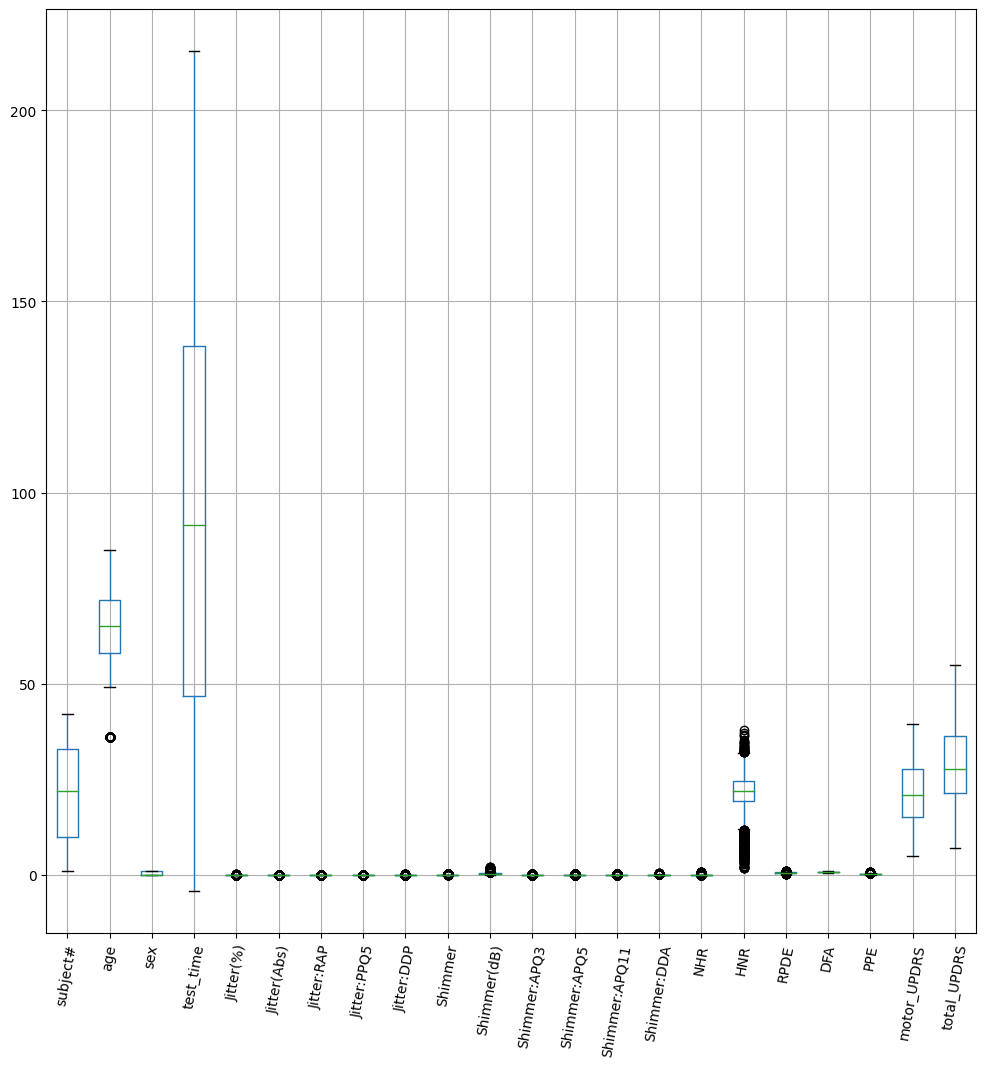

In [12]:
data.boxplot(figsize=(12, 12))
plt.xticks(rotation=80)
plt.show()

The boxplot allows us to visualize the descriptive statistics. `test time` has a very large range, ranging from 0 to over 200 days. There appears to be many outliers in the data as well, with outliers in every column except `sex`, `test_time`, `motor_UPDRS`, and `total_UPDRS`. The ranges of many of the voice measures are very small compared to other columns, so I will create another boxplot specifically for those columns.

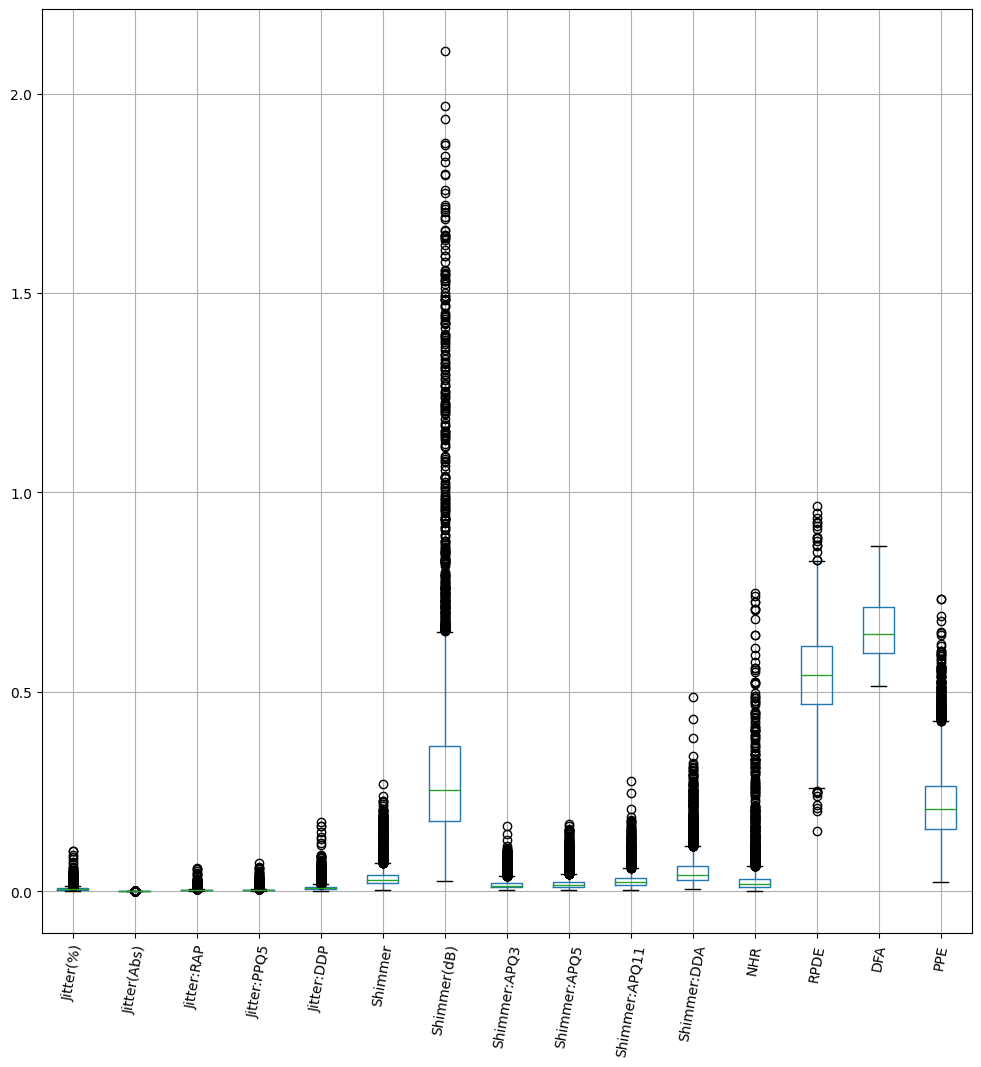

In [13]:
data.iloc[:, 4:-2].drop('HNR', axis=1).boxplot(figsize=(12, 12))
plt.xticks(rotation=80)
plt.show()

As I mentioned above, there are many outliers present in the data. After taking a closer look, we see there are also no outliers present in the `DFA` column.

Text(0.5, 0, 'Columns')

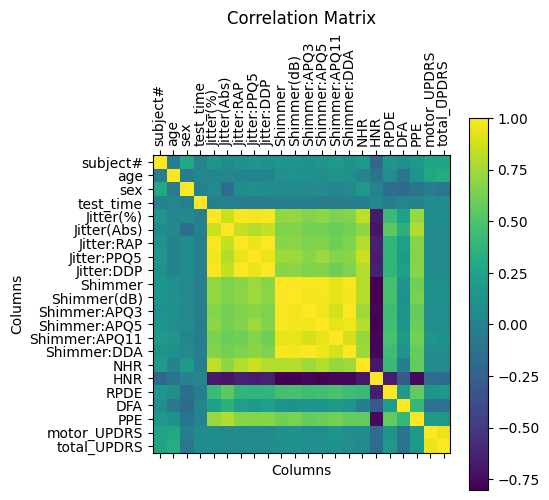

In [14]:
plt.matshow(data.corr())
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(22), list(data.columns), rotation=90)
plt.yticks(range(22), list(data.columns))
plt.ylabel('Columns')
plt.xlabel('Columns')

Based on the correlation matrix, we can see that the 'Jitter' voice measures are all strongly correlated with one another, as are the 'Shimmer' voice measures. `test_time` also appears to be strongly correlated with the Jitter voice measures.

In [15]:
no_motor_data = data.drop('motor_UPDRS', axis=1)
no_motor_data.set_index('subject#', inplace=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(no_motor_data.iloc[:, :-1], no_motor_data.iloc[:, -1], test_size=0.3, random_state=17)

After dropping `motor_UPDRS` and setting the index using `subject#`, I split the data reserving 30% for the test set.

## 2. Use cross-validation to build a linear regression model to predict total_UPDRS. (25 points)

In [17]:
lr = LinearRegression()

In [18]:
scoring = ['r2', 'neg_mean_absolute_error']

I will use the $R^{2}$ statistic as well as Mean Absolute Error (MAE) to evaluate the model's performance.

In [19]:
lr_scores = cross_validate(lr, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

With the split data and our scoring metrics, we can use `cross_validate` to train our linear regression model.

## 3. Use cross-validation to build a regression tree model to predict total_UPDRS. (25 points)

To train a decision tree regressor model, I repeated the above steps using a `DecisionTreeRegressor` model.

In [20]:
rt = DecisionTreeRegressor(min_samples_leaf=5, random_state=17)

In [21]:
rt_scores = cross_validate(rt, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

## 4. Use cross-validation to build a neural network model to predict total_UPDRS. (25 points)

To train a neural network model, I perform the steps used above as well as additional preprocessing of the data. Before training the model, I scaled the data then performed cross validation.

In [22]:
train, test = train_test_split(no_motor_data, test_size=0.3, random_state=17)

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


In [25]:
X_train_scaled = train[:, :-1]
X_test_scaled = test[:, :-1]
y_train_scaled = train[:, -1]
y_test_scaled = train[:, -1]

In [26]:
nn = MLPRegressor(10, activation='logistic', max_iter=10000, random_state=17)

In [27]:
nn_scores = cross_validate(nn, X_train_scaled, y_train_scaled, scoring=scoring, cv=10, return_train_score=True)

## 5. Compare their performance with MAE, which model has better performance? Is there any way to improve the model? (5 points)

In [28]:
pd.DataFrame(lr_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.014969,0.008673,0.150536,0.179308,-8.269518,-8.002652
1,0.031680,0.003911,0.159631,0.178165,-8.097764,-8.040017
2,0.019234,0.003468,0.103053,0.184252,-8.603649,-7.966915
3,0.034776,0.009465,0.137879,0.179379,-8.052315,-8.042552
4,0.034822,0.008548,0.234836,0.170016,-7.606407,-8.085852
5,0.041581,0.013002,0.194360,0.174166,-7.977323,-8.028168
6,0.045054,0.024715,0.165132,0.177011,-7.843461,-8.046822
7,0.050093,0.021306,0.170053,0.175696,-8.638175,-7.940304
8,0.020783,0.011023,0.161907,0.177629,-7.746615,-8.075208
9,0.036392,0.005702,0.164252,0.177449,-7.923983,-8.041641


In [29]:
pd.DataFrame(rt_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.225441,0.010187,0.916537,0.973254,-1.366370,-0.679363
1,0.181498,0.011172,0.915225,0.974645,-1.303300,-0.654612
2,0.257494,0.009532,0.898116,0.969692,-1.396603,-0.768825
3,0.236119,0.014649,0.914279,0.974920,-1.232705,-0.627672
4,0.207176,0.009632,0.925617,0.974866,-1.128503,-0.649045
5,0.199330,0.007081,0.930197,0.973855,-1.054891,-0.622626
6,0.243477,0.003910,0.927098,0.977692,-1.001655,-0.598264
7,0.232723,0.010978,0.893020,0.980259,-1.292426,-0.543855
8,0.225937,0.004204,0.873235,0.975165,-1.337020,-0.647595
9,0.277488,0.013675,0.939720,0.979134,-0.868107,-0.570555


In [30]:
pd.DataFrame(nn_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.608361,0.002035,0.109651,0.108824,-0.175327,-0.171199
1,0.454509,0.001324,0.095083,0.109961,-0.172798,-0.171426
2,0.480741,0.006768,0.081174,0.110214,-0.179171,-0.171389
3,0.390121,0.001580,0.076385,0.089678,-0.173146,-0.173235
4,0.233102,0.006776,0.097625,0.073419,-0.168706,-0.174579
5,0.378604,0.001239,0.085911,0.087766,-0.174678,-0.172669
6,0.269289,0.001361,0.067317,0.082932,-0.165322,-0.174061
7,0.421933,0.001144,0.078450,0.092502,-0.187747,-0.170858
8,0.345060,0.001502,0.101974,0.093170,-0.163515,-0.174067
9,0.827070,0.001475,0.115323,0.127584,-0.167713,-0.171612


In analyzing the results, we can see the neural network performs the best with the greatest test MAE values. However, it appears the decision tree model explains the variance of the data better than the other models. One way we can improve thw MAE score of the DecisionTreeRegressor model is by increaing the min_samples used. Let's perform optimization of teh DecisionTreeRegressor in the next section.





## 6. Try to optimize the tree model or neural network model (Choose one). (10 points)


To optimize our tree model, we use cross validation to train the model using the values 8 and 10 for the min_samples_leaf parameter.

In [45]:
rt_8 = DecisionTreeRegressor(min_samples_leaf=8, random_state=17)

In [46]:
rt_10 = DecisionTreeRegressor(min_samples_leaf=10, random_state=17)

In [47]:
rt_8_scores = cross_validate(rt_8, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

In [48]:
rt_10_scores = cross_validate(rt_10, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

In [49]:
pd.DataFrame(rt_8_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.071446,0.003000,0.906599,0.954677,-1.634934,-1.048364
1,0.054737,0.002674,0.912803,0.962340,-1.442689,-0.941115
2,0.057112,0.002691,0.841575,0.950183,-1.779936,-1.100070
3,0.056239,0.002622,0.905075,0.959355,-1.450588,-0.948659
4,0.055850,0.002671,0.899643,0.959723,-1.417356,-0.950205
5,0.055339,0.002655,0.935354,0.961962,-1.160235,-0.905112
6,0.064396,0.003927,0.906992,0.967803,-1.285183,-0.840763
7,0.054567,0.002641,0.915853,0.968951,-1.331605,-0.803293
8,0.055126,0.003423,0.907083,0.966071,-1.401379,-0.896462
9,0.058440,0.002719,0.919820,0.970587,-1.078946,-0.789066


In [50]:
pd.DataFrame(rt_10_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.062693,0.002685,0.902882,0.945643,-1.770320,-1.213081
1,0.056689,0.005553,0.918281,0.951773,-1.472012,-1.095392
2,0.054348,0.002625,0.835053,0.938905,-1.912198,-1.295406
3,0.056224,0.002618,0.896150,0.952020,-1.586664,-1.103839
4,0.057126,0.003865,0.901437,0.948391,-1.567926,-1.146725
5,0.060020,0.002729,0.916027,0.954290,-1.415074,-1.063518
6,0.055525,0.002711,0.921225,0.957375,-1.283888,-1.003532
7,0.061115,0.002886,0.890566,0.956841,-1.593334,-1.021672
8,0.054639,0.002666,0.894601,0.957872,-1.528576,-1.051954
9,0.053176,0.002668,0.912353,0.960072,-1.223230,-0.971682


The best test MAE score yielded by the tree model with a min_sample_leaf value of 5 was -0.868107. After attempting to optimize the tree model by initiating the model with various min_sample_leaf values, we could not attain an MAE score better than -0.868107. These results suggest that 5 may be a better parameter value than 8 and 10.